# Boussiala Mohamed Nachid
## boussiala.nachid@univ-alger3.dz

In [1]:
# load a dataset
from pycaret.datasets import get_data
diabete= get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diabete.columns.tolist()

['Number of times pregnant',
 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
 'Diastolic blood pressure (mm Hg)',
 'Triceps skin fold thickness (mm)',
 '2-Hour serum insulin (mu U/ml)',
 'Body mass index (weight in kg/(height in m)^2)',
 'Diabetes pedigree function',
 'Age (years)',
 'Class variable']

In [3]:
from pycaret.classification import *

s = setup(diabete, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


`setup()` is the initial step in any PyCaret workflow. It initializes the environment in PyCaret and creates the transformation pipeline for preparing the data for modeling and deployment. It takes a lot of parameters, but the key ones are:

    `data`: The dataset you want to use for the classification task. This should be a pandas DataFrame.
    `target`: The name of the target variable in the dataset. This is what you want to predict.
    `session_id`: A random seed for reproducibility purposes. It ensures that your experiments can be replicated in the same way.
    `train_size`: The proportion of the dataset to include in the train split (if you’re not providing a separate test dataset).
    `normalize`: When set to True, it scales the features using the standardization technique.
    `categorical_features`: List of categorical features in the dataset.
    `ignore_features`: List of features to be ignored in model training.


The setup table gives information about the data and the operations that will be conducted on data, for example missing value imputation or cross-validation.

In [9]:
# model training and selection
best_diabete = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,1.7130
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0580
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0460
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.3470
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0460
gbc,Gradient Boosting Classifier,0.7373,0.7914,0.5550,0.6445,0.5931,0.4013,0.4059,0.2880
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.2020
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.2810
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0520
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.2260


`compare_models()` function compares all models in the model library and scores them using cross-validation. The default metric used for comparison depends on the problem (e.g., accuracy for classification).

It gives the results on the fly, you see the results on running. And it returns the best-performing model.

The `create_model` function is used to create a model, train it on the given dataset, and evaluate its performance using cross-validation. It simplifies the process of training and evaluating various machine-learning models for classification tasks.

In [13]:
# rf for random forest

model = s.create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8820,0.5789,0.7857,0.6667,0.5248,0.5375
1,0.7593,0.8098,0.6316,0.6667,0.6486,0.4658,0.4661
2,0.7593,0.8782,0.4737,0.7500,0.5806,0.4236,0.4456
3,0.7037,0.7632,0.4737,0.6000,0.5294,0.3175,0.3223
4,0.8148,0.8496,0.6842,0.7647,0.7222,0.5840,0.5860
5,0.6852,0.6699,0.4211,0.5714,0.4848,0.2656,0.2720
6,0.7963,0.7850,0.6316,0.7500,0.6857,0.5367,0.5410
7,0.7925,0.8603,0.5000,0.8182,0.6207,0.4890,0.5171
8,0.6792,0.6833,0.4444,0.5333,0.4848,0.2548,0.2570


*Key parameters of create_model* :

    . estimator `estimator`: The ID of the model you want to create. This is typically a string that corresponds to a specific type of classification model (e.g., ‘rf’ for Random Forest, ‘xgboost’ for XGBoost).
    . `fold`: The number of folds to be used in k-fold cross-validation.
    . `cross_validation`: Whether to perform cross-validation or not.


It applied 10-fold cross-validation.

We can evaluate the model. The library offers dynamic reporting, enabling us to view various metrics visually.

In [18]:
s.evaluate_model(best_diabete)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

`The evaluate_model` function is designed to provide a comprehensive evaluation of the trained machine-learning model. It offers various diagnostic tools and plots to assess the performance and characteristics of the model.

In [21]:
s.tune_model(best_diabete)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.8992,0.7368,0.8750,0.8000,0.7051,0.7108
1,0.8148,0.7850,0.6316,0.8000,0.7059,0.5735,0.5820
2,0.8704,0.9353,0.6842,0.9286,0.7879,0.6976,0.7145
3,0.7222,0.7744,0.4737,0.6429,0.5455,0.3520,0.3605
4,0.8704,0.9113,0.6842,0.9286,0.7879,0.6976,0.7145
5,0.6481,0.6662,0.3684,0.5000,0.4242,0.1792,0.1835
6,0.7407,0.8030,0.5789,0.6471,0.6111,0.4176,0.4190
7,0.7736,0.8746,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.6604,0.6778,0.4444,0.5000,0.4706,0.2219,0.2227


Fitting 10 folds for each of 10 candidates, totalling 100 fits


LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The `tune_model` automatically finds the best hyperparameters for the given machine-learning model. It uses different search strategies to explore a range of possible hyperparameter values and identifies the combination that yields the best performance based on a specified metric.

Key parameters:

    .`estimator`: The machine learning model that you want to tune, typically created using the create_model function.
    .`fold`: Number of folds to be used for cross-validation.
    .`optimize`: The metric to optimize while tuning. Common metrics include accuracy, AUC, recall, precision, etc.
    .`n_iter`: Number of iterations in the search process (important for methods like random search).
    .`custom_grid`: A custom grid of hyperparameters to search over (optional).
    .`search_library`: The library to be used for hyperparameter tuning in the model optimization process: scikit-learn (default), scikit-optimize, tune-sklearn, optuna.
    .`search_algorithm`: The algorithm to use for searching the hyperparameter space (e.g., 'random', 'grid', 'bayesian').

`plot_model` provides a simple and efficient way to create a variety of plots related to the performance and analysis of classification models.

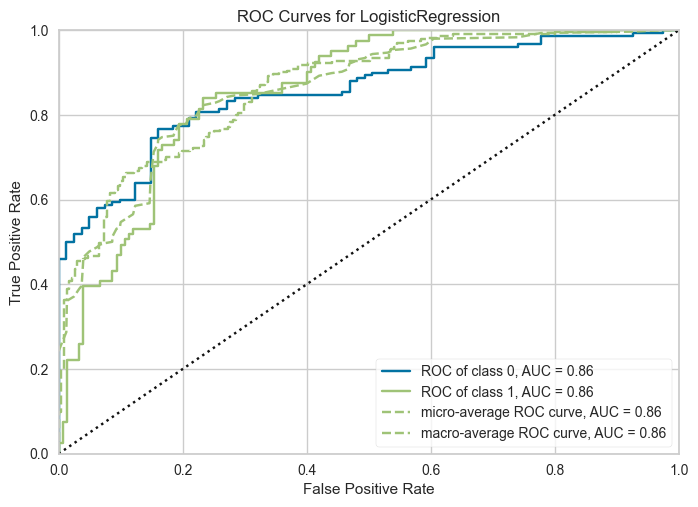

In [26]:
s.plot_model(best_diabete, plot = 'auc')

`finalize_model` trains the selected machine learning model on the entire dataset, including both the training and testing sets. This is typically done after you have experimented with various models, tuned their hyperparameters, and evaluated them using techniques like cross-validation. Once you have identified the best model for your needs, finalize_model allows you to use the entire dataset to train it, thereby leveraging more data for improved learning.

In [29]:
final_model = finalize_model(best_diabete)
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weight in '
                                             'kg/(height in m)^2)',
                                             'Diabetes pedigre...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

`predict_model` applies a trained classification model to a dataset for which the target outcomes are unknown or to evaluate its performance on a hold-out test set.

In [32]:
predict_model(best_diabete)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8036
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9394
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7999
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6392
...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.400002,0.698,27,0,0,0.8002
7,10,115,0,0,0,35.299999,0.134,29,0,1,0.6230
298,14,100,78,25,184,36.599998,0.412,46,1,0,0.5985
341,1,95,74,21,73,25.900000,0.673,36,0,0,0.9243


In [37]:
# evaluate trained model
evaluate_model(best_diabete)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

`Model blending` is a technique where predictions from multiple models are combined, often leading to more accurate and robust predictions than any single model could achieve on its own. The blend_models function in PyCaret automates this process, making it easy to create a blended model from a set of individual models.

In [35]:
from pycaret.classification import blend_models, create_model

model1 = create_model('dt')  # Decision Tree
model2 = create_model('rf')  # Random Forest
model3 = create_model('svm') # Support Vector Machine

blended_model = blend_models(estimator_list=[model1, model2, model3])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.6774,0.5263,0.6250,0.5714,0.3682,0.3711
1,0.7037,0.6872,0.6316,0.5714,0.6000,0.3656,0.3668
2,0.7407,0.7038,0.5789,0.6471,0.6111,0.4176,0.4190
3,0.5926,0.5053,0.2105,0.3636,0.2667,0.0116,0.0125
4,0.7778,0.7684,0.7368,0.6667,0.7000,0.5242,0.5259
5,0.6296,0.5940,0.4737,0.4737,0.4737,0.1880,0.1880
6,0.6296,0.5699,0.3684,0.4667,0.4118,0.1469,0.1491
7,0.8302,0.7770,0.6111,0.8462,0.7097,0.5940,0.6098
8,0.6604,0.6079,0.4444,0.5000,0.4706,0.2219,0.2227


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8820,0.5789,0.7857,0.6667,0.5248,0.5375
1,0.7593,0.8098,0.6316,0.6667,0.6486,0.4658,0.4661
2,0.7593,0.8782,0.4737,0.7500,0.5806,0.4236,0.4456
3,0.7037,0.7632,0.4737,0.6000,0.5294,0.3175,0.3223
4,0.8148,0.8496,0.6842,0.7647,0.7222,0.5840,0.5860
5,0.6852,0.6699,0.4211,0.5714,0.4848,0.2656,0.2720
6,0.7963,0.7850,0.6316,0.7500,0.6857,0.5367,0.5410
7,0.7925,0.8603,0.5000,0.8182,0.6207,0.4890,0.5171
8,0.6792,0.6833,0.4444,0.5333,0.4848,0.2548,0.2570


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6111,0.7158,0.5789,0.4583,0.5116,0.1957,0.1994
1,0.6296,0.4586,0.0000,0.0000,0.0000,-0.0365,-0.1012
2,0.6667,0.5038,0.0526,1.0000,0.1000,0.0672,0.1864
3,0.5926,0.7248,0.7895,0.4545,0.5769,0.2355,0.2696
4,0.6481,0.3895,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6481,0.6256,0.4211,0.5000,0.4571,0.1997,0.2013
6,0.6667,0.6105,0.0526,1.0000,0.1000,0.0672,0.1864
7,0.6604,0.6841,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.3585,0.6825,0.8889,0.3333,0.4848,-0.0181,-0.0411


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.0000,0.5789,0.6111,0.5946,0.3836,0.3839
1,0.7593,0.0000,0.4737,0.7500,0.5806,0.4236,0.4456
2,0.7593,0.0000,0.4211,0.8000,0.5517,0.4081,0.4474
3,0.6296,0.0000,0.3684,0.4667,0.4118,0.1469,0.1491
4,0.8148,0.0000,0.5789,0.8462,0.6875,0.5624,0.5828
5,0.6481,0.0000,0.4737,0.5000,0.4865,0.2192,0.2194
6,0.6852,0.0000,0.3158,0.6000,0.4138,0.2260,0.2477
7,0.7925,0.0000,0.4444,0.8889,0.5926,0.4734,0.5245
8,0.6981,0.0000,0.5556,0.5556,0.5556,0.3270,0.3270
